##import

In [108]:
import os
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

# Annual Sales Analysis

##database

In [83]:
# Create a folder to data
try:
  os.mkdir("/content/data")
except Exception as e:
  print(e)

path = "/content/data"
csv_file = "all_sales.csv"

[Errno 17] File exists: '/content/data'


In [84]:
files = [file for file in os.listdir(path) if not file.startswith('.')]

all_months_data = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path+"/"+file)
    all_months_data = pd.concat([all_months_data, current_data])
    
all_months_data.to_csv(csv_file, index=False)

In [85]:
# Show all data but now grouped
all_data = pd.read_csv(csv_file)
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001"
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301"
2,278799,Apple Airpods Headphones,1,150.0,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001"
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101"
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215"
...,...,...,...,...,...,...
186845,278792,AA Batteries (4-pack),1,3.84,10/12/19 04:32,"920 Adams St, San Francisco, CA 94016"
186846,278793,Wired Headphones,1,11.99,10/28/19 22:00,"161 Chestnut St, Los Angeles, CA 90001"
186847,278794,AA Batteries (4-pack),1,3.84,10/09/19 20:58,"346 Spruce St, San Francisco, CA 94016"
186848,278795,iPhone,1,700,10/31/19 17:21,"291 Hill St, Seattle, WA 98101"


##preprocess data

In [86]:
# Clear all NAN values

nan_df = all_data[all_data.isna().any(axis=1)]

all_data = all_data.dropna(how='all')

In [87]:
all_data = all_data[all_data['Order Date'].str[0:2]!='Or']

In [88]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

In [89]:
# add month column
all_data['Month 2'] = pd.to_datetime(all_data['Order Date']).dt.month

# add city column
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")


In [90]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month 2,City
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001",11,New York City (NY)
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301",11,Austin (TX)
2,278799,Apple Airpods Headphones,1,150.00,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001",11,Los Angeles (CA)
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101",11,Seattle (WA)
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215",11,Boston (MA)
...,...,...,...,...,...,...,...,...
186845,278792,AA Batteries (4-pack),1,3.84,10/12/19 04:32,"920 Adams St, San Francisco, CA 94016",10,San Francisco (CA)
186846,278793,Wired Headphones,1,11.99,10/28/19 22:00,"161 Chestnut St, Los Angeles, CA 90001",10,Los Angeles (CA)
186847,278794,AA Batteries (4-pack),1,3.84,10/09/19 20:58,"346 Spruce St, San Francisco, CA 94016",10,San Francisco (CA)
186848,278795,iPhone,1,700.00,10/31/19 17:21,"291 Hill St, Seattle, WA 98101",10,Seattle (WA)


# Sales Output

##sales by month

In [91]:
# show sales by month
all_data['Sales'] = all_data['Quantity Ordered'].astype('int') * all_data['Price Each'].astype('float')
all_data.groupby(['Month 2']).sum()

,Quantity Ordered,Price Each,Sales
Month 2,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


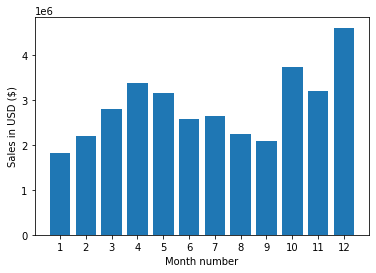

In [92]:
#plot sales by month
months = range(1,13)

plt.bar(months,all_data.groupby(['Month 2']).sum()['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

##which city sold more products

In [93]:
all_data.groupby(['City']).sum()

,Quantity Ordered,Price Each,Month 2,Sales
City,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58
Austin (TX),11153,1809873.61,69829,1819581.75
Boston (MA),22528,3637409.77,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,2767975.40
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Portland (ME),2750,447189.25,17144,449758.27
Portland (OR),11303,1860558.22,70621,1870732.34
San Francisco (CA),50239,8211461.74,315520,8262203.91


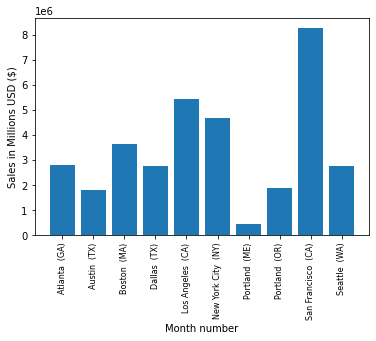

In [99]:
keys = [city for city, df in all_data.groupby(['City'])]

plt.bar(keys,all_data.groupby(['City']).sum()['Sales'])
plt.ylabel('Sales in Millions USD ($)')
plt.xlabel('Month number')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

##best time to show ads engaging people to buy

In [95]:
# Add hour and minutes column
# don't add it early in the code :)

all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute
all_data['Count'] = 1

In [ ]:
# show top 
all_data.head()

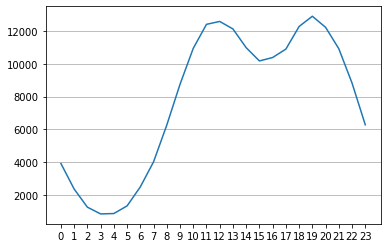

In [101]:
keys = [pair for pair, df in all_data.groupby(['Hour'])]

plt.plot(keys, all_data.groupby(['Hour']).count()['Count'])
plt.xticks(keys)
plt.grid(axis='y')
plt.show()

##products who are often sold together

In [115]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(f"{key} where sold {value} times together")

('iPhone', 'Lightning Charging Cable') where sold 1005 times together
('Google Phone', 'USB-C Charging Cable') where sold 987 times together
('iPhone', 'Wired Headphones') where sold 447 times together
('Google Phone', 'Wired Headphones') where sold 414 times together
('Vareebadd Phone', 'USB-C Charging Cable') where sold 361 times together
('iPhone', 'Apple Airpods Headphones') where sold 360 times together
('Google Phone', 'Bose SoundSport Headphones') where sold 220 times together
('USB-C Charging Cable', 'Wired Headphones') where sold 160 times together
('Vareebadd Phone', 'Wired Headphones') where sold 143 times together
('Lightning Charging Cable', 'Wired Headphones') where sold 92 times together


#what product sold most

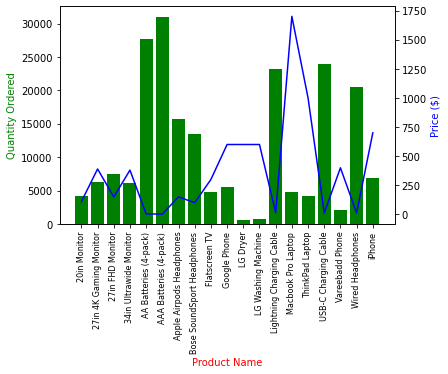

In [120]:
prices = all_data.groupby('Product').mean()['Price Each']

product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

keys = [pair for pair, df in product_group]

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name', color='r')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()